/home/joseph/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


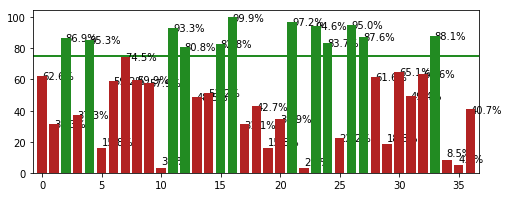

In [7]:
#matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import pandas
import numpy as np

df = pandas.DataFrame(np.random.uniform(size=37)*100, columns=['A'])
threshold = 75
fig, ax = plt.subplots(figsize=(8,3))

good = df['A'][df['A'] >= threshold]
bad = df['A'][df['A'] < threshold]

ax.bar(left=good.index, height=good, align='center', color='ForestGreen', zorder=5)
ax.bar(left=bad.index, height=bad, align='center', color='Firebrick', zorder=5)

ax.axhline(y=threshold, linewidth=2, color='ForestGreen', zorder=0)

#ax.set_xticks(df.index)
ax.set_xlim(left=df.index[0]-0.75, right=df.index[-1]+0.75)

def annotateBars(row, ax=ax):
    if row['A'] < 20:
        color = 'black'
        vertalign = 'bottom'
        vertpad = 2
    else:
        color = 'white'
        vertalign = 'top'
        vertpad = -2

    ax.text(row.name, row['A'] + vertpad, "{:.1f}%".format(row['A']))
            #zorder=10, rotation=90, color=color,
            #horizontalalignment='center',
            #verticalalignment=vertalign,
            #fontsize=8, weight='heavy')

junk = df.apply(annotateBars, ax=ax, axis=1)
plt.show()